In [1]:
%matplotlib inline

from time import time
import nbimporter
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace

pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
plt.style.use = "default"

In [2]:
train = pd.read_csv("data/TrainData1.txt", sep='\t')
labels = pd.read_csv("data/TrainLabel1.txt", sep='\t')

In [3]:
train.describe()

,3.82425408486233,1.92376196082870,1.91844974240116,2.35206669080519,3.11729781664639,3.05173505129779,3.30797713222509,3.43022183905707,3.58666718050779,3.60521774740972,...,1.83683028648888.12,1.85564028089015.11,1.14238946611884.6,2.05434488876763.5,2.80822448109616,1.78218586649202.12,2.66570291403744.1,2.46821436276855.2,2.47858092374228.4,2.30884176126132.4
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,...,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,13422818791946309457778495933816971564560215186...,67114093959731547288892479669084857822801075932...,13422818791946309457778495933816971564560215186...,13422818791946309457778495933816971564560215186...,20134228187919464186667743900725457346840322779...,13422818791946309457778495933816971564560215186...,3.504,13422818791946309457778495933816971564560215186...,13422818791946309457778495933816971564560215186...,26845637583892618915556991867633943129120430373...,...,26845637583892618915556991867633943129120430373...,67114093959731547288892479669084857822801075932...,1.250,40268456375838928373335487801450914693680645559...,67114093959731547288892479669084857822801075932...,67114093959731547288892479669084857822801075932...,67114093959731547288892479669084857822801075932...,26845637583892618915556991867633943129120430373...,33557046979865773644446239834542428911400537966...,13422818791946309457778495933816971564560215186...
std,11546481745700334532041446684281935174181082516...,81923192051904040180026773983385323642459353772...,11546481745700336049751518735632771830010697222...,11546481745700337567461590786983608485840311928...,14093311897214878950381315815876273286336264059...,11546481745700337567461590786983608485840311928...,0.129,11546481745700337567461590786983608485840311928...,11546481745700337567461590786983608485840311928...,16217727724465412374902982829292987442685014929...,...,16217727724465409339482838726591314131025785517...,81923192051904040180026773983385323642459353772...,0.341,19725119911506460485109985481592386033114246749...,81923192051904040180026773983385323642459353772...,81923192051904055357127494496893690200755500830...,81923192051904040180026773983385323642459353772...,16217727724465412374902982829292987442685014929...,18069338605547722241511982604358942422451091585...,11546481745700336049751518735632771830010697222...
min,3.719,1.000,1.000,1.795,2.705,2.895,3.032,2.988,3.241,3.380,...,1.000,1.000,1.000,1.859,2.571,1.338,2.273,1.000,1.627,1.195
25%,3.821,1.621,1.702,2.291,3.262,3.253,3.430,3.446,3.551,3.602,...,1.414,1.574,1.000,2.103,2.966,1.768,2.501,1.000,2.323,1.945
50%,3.855,1.966,1.895,2.447,3.369,3.378,3.528,3.500,3.617,3.640,...,1.803,1.723,1.000,2.153,3.081,1.882,2.586,1.723,2.545,2.094
75%,3.894,2.177,2.097,2.619,3.466,3.478,3.579,3.564,3.661,3.679,...,2.042,1.865,1.457,2.243,3.215,2.024,2.636,2.063,2.690,2.225
max,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,3.736,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,2.652,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...


In [4]:
labels.describe()

,1
count,149.000
mean,1.604
std,1.096
min,1.000
25%,1.000
50%,1.000
75%,2.000
max,5.000


# Data Cleaning

#### Todos:
+ figure out how many and which rows for each column have these huge numbers
+ figure out a way to map the values to ones that fit more with the data 
    * make them "average joes"

In [5]:
fr = train.iloc[0,:] # first row
poten_errors = fr[fr > fr.mean()]
poten_errors.describe()

count                                               69.000
mean    10000000000000002101697803323328251387822715387...
std     12230631806435245486489244355180364340614809249...
min     10000000000000000887529745682247582063159023622...
25%     10000000000000000887529745682247582063159023622...
50%     10000000000000000887529745682247582063159023622...
75%     10000000000000000887529745682247582063159023622...
max     10000000000000000887529745682247582063159023622...
Name: 0, dtype: float64

In [6]:
fr[~(fr > fr.mean())].describe()

count   3243.000
mean       2.167
std        0.553
min        1.000
25%        1.884
50%        2.194
75%        2.482
max        3.904
Name: 0, dtype: float64

We have 69 rows with vastly diffrent values. We can't just drop the rows or columns because the signal to noise ratio for both axis is really low. Lets find out more about these errors.

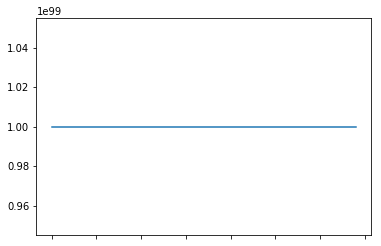

In [7]:
poten_errors.plot.line()

It seems like all the error numbers are the same even though the standard deviation, mean, and max are different numbers. Let's verify that the numbers are actually the same.

In [8]:
mMax = poten_errors.max()
all_diffs = [mMax - i for i in poten_errors]
extreme_diffs = poten_errors.max() - poten_errors.min()

print("Max - Min\n", extreme_diffs, "\nMax - All\n", all_diffs)

Max - Min
 0.0 
Max - All
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Since all the errors are indeed the same number, lets replace all of them with the mean of the particular column that they're in for now. We can think of a better way to replace those values later.

In [9]:
for col in train.columns:
    train_col = train[col]
    gt_mean = train_col > train_col.mean()
    new_col_mean = train_col[~gt_mean].mean()
    
    train[col][gt_mean] = new_col_mean

In [10]:
train.describe()

,3.82425408486233,1.92376196082870,1.91844974240116,2.35206669080519,3.11729781664639,3.05173505129779,3.30797713222509,3.43022183905707,3.58666718050779,3.60521774740972,...,1.83683028648888.12,1.85564028089015.11,1.14238946611884.6,2.05434488876763.5,2.80822448109616,1.78218586649202.12,2.66570291403744.1,2.46821436276855.2,2.47858092374228.4,2.30884176126132.4
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,...,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,3.854,1.889,1.878,2.449,3.348,3.356,3.386,3.480,3.593,3.633,...,1.683,1.729,1.031,2.161,3.083,1.889,2.574,1.620,2.483,2.060
std,0.048,0.392,0.304,0.227,0.178,0.175,0.063,0.120,0.092,0.061,...,0.418,0.265,0.058,0.111,0.197,0.231,0.107,0.524,0.284,0.231
min,3.719,1.000,1.000,1.795,2.705,2.895,3.032,2.988,3.241,3.380,...,1.000,1.000,1.000,1.859,2.571,1.338,2.273,1.000,1.627,1.195
25%,3.821,1.621,1.702,2.291,3.262,3.253,3.386,3.446,3.551,3.602,...,1.414,1.574,1.000,2.103,2.966,1.768,2.501,1.000,2.323,1.945
50%,3.854,1.949,1.887,2.447,3.363,3.372,3.386,3.498,3.608,3.638,...,1.763,1.723,1.000,2.153,3.081,1.882,2.585,1.673,2.539,2.093
75%,3.887,2.172,2.092,2.599,3.457,3.466,3.395,3.559,3.658,3.677,...,2.027,1.862,1.031,2.218,3.212,2.021,2.636,2.053,2.669,2.217
max,3.973,2.695,2.619,2.966,3.720,3.722,3.502,3.689,3.742,3.743,...,2.321,2.625,1.246,2.512,3.527,2.724,2.800,2.903,3.084,2.576


Lets find out how correlated each of these variabels are with the label.

In [11]:
def corr(labels, train):
    n = len(labels)
    v1, v2 = labels.values, train.values
    sums = np.multiply.outer(v2.sum(0), v1.sum(0))
    stds = np.multiply.outer(v2.std(0), v1.std(0))
    return pd.DataFrame((v2.T.dot(v1) - sums / n) / stds / n, train.columns, labels.columns)

In [12]:
train_label_corr = corr(labels, train)

In [13]:
def count_corrs(correlation_result, with_labels=True):
    if with_labels:
        return [(i, correlation_result[correlation_result > i].dropna().size) for i in np.arange(0,1.1,.1)]
    else:
        return [correlation_result[correlation_result > i].dropna().size for i in np.arange(0,1.1,.1)]

In [31]:
count_corrs(train_label_corr)

[(0.0, 1907),
 (0.1, 1459),
 (0.2, 1090),
 (0.30000000000000004, 687),
 (0.4, 369),
 (0.5, 161),
 (0.6000000000000001, 37),
 (0.7000000000000001, 4),
 (0.8, 0),
 (0.9, 0),
 (1.0, 0)]

Looks like there are lots of columns that aren't at all correlated with the labels. Let's drop all the ones who have a 20% or lower correlation. 

*idea: to improve the model, we could look into using the 20% category and play with corrlated columns in that category.*

In [15]:
train = train[train_label_corr[train_label_corr >= .3].dropna().index]

In [16]:
# train.describe()

We still have so many columns. For now, it's fine but we could use PCA to reduce the columns.

In [17]:
# http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
# https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
# https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
train_corrs = train.corr()
correlation_threshold = .85
# threshold for dropping correlated columns
high_corrs = {}
for col in train_corrs:
    df = train_corrs[col]
    corrs = df[df >= correlation_threshold].dropna().keys().drop(col)
    if corrs.size > 0:
        high_corrs[col] = corrs

In [18]:
new_label_map = {}
for i, col in enumerate(train.columns):
    new_label_map[col] = "f{}".format(i)

train = train.rename(columns=new_label_map)

labels = labels.rename(columns={"1": "label"})
merged = labels.merge(train, left_index=True,right_index=True)

train.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f677', 'f678', 'f679', 'f680', 'f681', 'f682', 'f683', 'f684', 'f685',
       'f686'],
      dtype='object', length=687)

# Data Analysis
- Are there a lot of outliers? If so, how many?
- What is the relationship between each of the variables and the label? Linear? Parabolic?

In [19]:
# train.describe()

Standard deviation is really good. Lets find outliers by getting the values that are `mean + std*n, n= {2 to 5}`

In [20]:
calc_low_high = lambda mean, std, i: (df.mean() + (df.std()*float(i)), df.mean() + (df.std()*float(i+1)))

v = {}
for col in train:
    df = train[col]
    f = []
    stds_from_min = np.floor((df.min() - df.mean()) / df.std())
    for i in range(int(stds_from_min), 0):
        low, high = calc_low_high(df.mean(), df.std(), i)
        num_in_range = df[(low < df) & (df < high)].size
        f.append((i, num_in_range))
    
    stds_from_max = (df.max() - df.mean()) / df.std()
    for i in range(int(np.ceil(stds_from_max))):
        low, high = calc_low_high(df.mean(), df.std(), i)
        num_in_range = df[(low < df) & (df < high)].size
        f.append((i, num_in_range))
    v[col] = f

In [21]:
# for col in train.columns:
#     train[col].plot.kde()
#     plt.legend()
#     plt.show()

In [22]:
std_dist = {}
for key in v:
    data = v[key]
    for item in data:
        if item[0] not in std_dist:
            std_dist[item[0]] = [item[1]]
        else:
            std_dist[item[0]].append(item[1])

The above shows, for each column in the training set, the number of values that fall into categories corresponding to the number of standard deveiations from the mean. 
The keys are the stds from mean and the values are the number of values that are that many stds from the mean found in each column.

In [23]:
# plt.figure(figsize=(12,6))
# for category in std_dist:
#     plt.hist(std_dist[category], label=str(category))
#     plt.legend()
#     plt.show()

It actually seems like there's not a whole lot of values that are super far away from the mean in terms of stds. If there were, we'd think about how to replace them or remove records (although removing would be a bad choice because we only have 149 records to start with)

Let's find out the relationship between the labels and each of the variables.

In [24]:
train_grouped = merged.groupby("label")

In [25]:
# train_grouped.describe()

# Model Building

## Which algorithm to use?
We'll use a random forest classifier (rfc) with bootstrapping and feature bagging optimizations because:
- ease of implementation
- rfcs handle multi-class predictions well without more additional effort
- works well with high dimensional data
- we'll choose use random forest as opposed to boosted trees since we have highly dimensional data
- with a reasonably high probability, can be used with the other datasets for this project since the algorithm is very robust

## The Algorithm
We'll use the CART algorithm for splitting since we have continuous data.  
  
[Full example](https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/)  
  
Steps:
1. Initialize Tree
2. For each column, calc best split across all rows based using gini impurity score - [exmplanation](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) | [exmaple](https://www.researchgate.net/post/How_to_compute_impurity_using_Gini_Index) | [useful blog](http://dni-institute.in/blogs/cart-algorithm-for-decision-tree/)
3. Split the dataset based on the split condition with the highest gini score and add both sets as leaves on a tree node. The node represents a decision point, that being the condition with the highest gini score.
3. Repeat 2 & 3 until an arbitrary minimum number of rows are left
4. Prune tree

ideas:
- instead of using the raw values, categorize the numbers as # of stds away from mean
- > Alternatively, the random forest can apply weight concept for considering the impact of result from any decision tree. Tree with high error rate are given low weight value and vise versa. This would increase the decision impact of trees with low error rate - [medium post](https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1)
- [parameters to  tune](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

In [26]:
# g = train[train["f1"] > 2.5].merge(labels, left_index=True, right_index=True).groupby("label")

# print(( 1 - (g.count()/149)**2).sum(axis=0))
# print(((g.count()/149) ** 2 )["f1"].sum())
# 1 - ((g.size() / 149) ** 2).sum()
# (g.count() / 149) ** 2
# (1 - np.sum((g.count() / 149) ** 2)) * 

In [27]:
def calc_best_gini_split(df, labels):
    total_rows = df.shape[0]
    
    def calc(col_df):
        print(col_df.name)
        min_cost = 2
        min_cost_index = -1
        for index, row in col_df.iteritems():
            split1 = col_df[row > col_df]
            split2 = col_df[row < col_df]

            s1_grouped = labels.merge(pd.DataFrame(split1), left_index=True, right_index=True).groupby("label")
            s2_grouped = labels.merge(pd.DataFrame(split2), left_index=True, right_index=True).groupby("label")

            s1_group_count = s1_grouped.count()
            s2_group_count = s2_grouped.count()
            
            s1_cost = (1 - np.power(s1_group_count / s1_group_count.sum(), 2).sum(axis=0)) * (split1.shape[0] / total_rows)
            s2_cost = (1 - np.power(s2_group_count / s2_group_count.sum(), 2).sum(axis=0)) * (split2.shape[0] / total_rows)

            total_cost = (s1_cost + s2_cost).iloc[0]
            if total_cost < min_cost:
                min_cost =total_cost
                min_cost_index = index
        return pd.Series({"cost": min_cost, "index": min_cost_index})
    
    splits = df.apply(calc, axis=0)
    best_split_col = splits.T["cost"].idxmin()
    best_split_index = splits[best_split_col]["index"]
    
    return best_split_col, df[best_split_col][best_split_index]

In [28]:
# g = calc_best_gini_split(train[["f1", "f0"]], labels)
# g

In [30]:
def make_trees(df, labels, trees=10, num_features=None, min_samples_for_split=8):
    if num_features is None:
        num_features = np.floor(np.sqrt(df.columns.size))
    trees = []
    for i in range(max_trees):
        features = np.random.choice(df.columns, size=num_features, replace=False)
        df = df[features]
        tree = {}
        while df.shape[0] >= min_samples_for_split:
            col, val = calc_best_gini_split(df, labels)
            